# Strategic Thinking CA 1 - Key Indicators of Heart Disease USA from 2020

**Students: Marie Garron, Eugen Efros, Eduardo Cohen, Lorna Sinclair and Abdirisak Nour**

## Objective

With Supervised  machine Learning for classification model, it is possible to predict xxxxxx with satisfying accuracy %. To do so,  we will analyse the impact of several independent factors on the 2 possible outcomes: having a heart attack or not. 


1.EDA
2.Normalisation or standardisation if needed
3. PCA
4. split train-test
5. resampling ???? before PCA?
6.ML

# EDA

In [149]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy import stats
import math

#visualisation
import seaborn as sns 
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
import matplotlib.dates as mdates
#import mglearn
import matplotlib as mpl
%matplotlib inline 
#plots are shown inline with cell
plt.style.use('ggplot') #style like R studio
mpl.rcParams['axes.unicode_minus'] = False 
#use hyphen in axis
sns.set(color_codes=True)

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from collections import Counter

#Machine Learning
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split, cross_val_score
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV, cross_val_predict, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

In [2]:
# Import this library to suppress the warnings
# The object 'warnings' is used to call the method 'filterwarnings' and ignore the warnings
import warnings
warnings.filterwarnings('ignore')  

## Overwiew of the dataset

We are using the dataset that was availble on Kaggle. This dataset is coming from:<br>
Sources: <br>


Information about the Metadata:<br>
<span class="mark">"HeartDisease" - yes or No - our target</span><br>
All dependent features: <br>


the ten first rows of the dataset

In [3]:
heart_df = pd.read_csv("dataset/heart_2020_cleaned.csv")
heart_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
print('Number of observations in the dataset:', heart_df.shape[0])
print('Number of features in the dataset:', heart_df.shape[1])

Number of observations in the dataset: 319795
Number of features in the dataset: 18


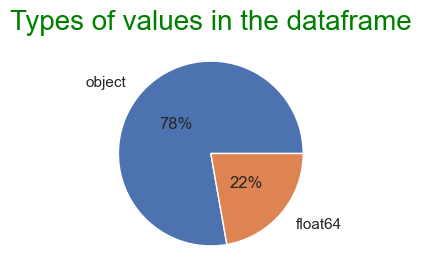

In [5]:
heart_df.dtypes.value_counts().plot(kind='pie', 
                                    autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,
                                    figsize=(3,3))

plt.title(label="Types of values in the dataframe",fontsize=20, color="green")
plt.ylabel('')
plt.show()

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
print("Percentage of missing values:", (heart_df.isna().sum().sum()/heart_df.shape[0]))

Percentage of missing values: 0.0


## Duplicates and uniqueness of the variables

In [8]:
print(f'Number of duplicate rows:', heart_df.duplicated().sum(), '\n' ,
      'Percentage of the total values: ',round((heart_df.duplicated().sum()/heart_df.shape[0])*100, 2),'%' )

Number of duplicate rows: 18078 
 Percentage of the total values:  5.65 %


**We have 5.65% of duplicate rows. xxx**


In [9]:
duplicate = heart_df[heart_df.duplicated(keep = 'last')]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
24,No,25.75,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,6.0,No,No,Yes
41,No,28.13,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Excellent,8.0,No,No,No
46,No,33.23,No,No,No,0.0,0.0,No,Male,65-69,White,Yes,Yes,Very good,8.0,No,No,No
102,No,23.49,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,8.0,No,No,No
104,No,25.09,Yes,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Very good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317618,No,27.46,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,No,Excellent,8.0,No,No,No
318065,No,28.06,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,9.0,No,No,No
318703,No,19.74,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
318736,No,24.41,Yes,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No


In [10]:
heart_df[(heart_df.BMI == 27.46) &
      (heart_df.HeartDisease == "No") &
      (heart_df.Smoking =="No") & 
      (heart_df.Sex == "Female") &
      (heart_df.AgeCategory == "45-49") &
      (heart_df.Race == "Hispanic") &
     (heart_df.SleepTime == 8.0) &
      (heart_df.GenHealth == "Excellent") &
     (heart_df.KidneyDisease == "No")]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
317618,No,27.46,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,No,Excellent,8.0,No,No,No
319117,No,27.46,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,No,Excellent,8.0,No,No,No


In [11]:
heart_df = heart_df.drop_duplicates()

In [12]:
print('Number of observations in the dataset,without the duplicates:', heart_df.shape[0])

Number of observations in the dataset,without the duplicates: 301717


**Checking the uniqueness in all features to see if we do not have any missing values and/or any kind of "exotic" values that would have change the type.**

In [13]:
for col in heart_df:
    print(f'{col:-<25} {heart_df[col].unique()}')

HeartDisease------------- ['No' 'Yes']
BMI---------------------- [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking------------------ ['Yes' 'No']
AlcoholDrinking---------- ['No' 'Yes']
Stroke------------------- ['No' 'Yes']
PhysicalHealth----------- [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth------------- [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking-------------- ['No' 'Yes']
Sex---------------------- ['Female' 'Male']
AgeCategory-------------- ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race--------------------- ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic----------------- ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity--------- ['Yes' 'No']
GenHealth-----

## Target value 

In [14]:
target= heart_df.iloc[: , [0]].copy() 
print("Percentage of negative class:", round((target[target['HeartDisease']== "No"].shape[0] / target.shape[0]) * 100), '%')
print("Percentage of positive class:", round((target[target['HeartDisease']== "Yes"].shape[0] / target.shape[0]) * 100), '%')
print(f'The target proportion is', 
      int(len(target[target['HeartDisease']== "No"])/len(target[target['HeartDisease']== "Yes"])),':1')

Percentage of negative class: 91 %
Percentage of positive class: 9 %
The target proportion is 10 :1


Text(0.5, 1.0, 'Target Value Count')

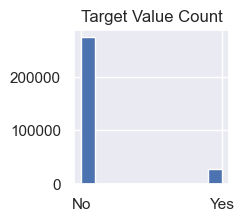

In [15]:
# Histogram plot of APS categories
fig, ax = plt.subplots(figsize=(2,2))

plt.hist(target['HeartDisease'])
plt.title("Target Value Count")

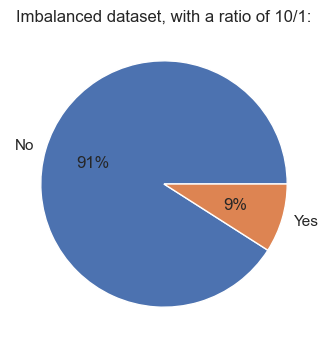

In [16]:
fig, ax = plt.subplots(1, 1,figsize =(5, 4))
ax.pie(target['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('Imbalanced dataset, with a ratio of 10/1:')
fig.show()

## Independant variables 

 **3 types of variables:**<br>
 - Categoricales (type yes/no, ordinal, etc.) 
 - Numerical 
 - Age Category

In [17]:
cat = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
'Asthma', 'KidneyDisease', 'SkinCancer']

num = ['HeartDisease', 'AgeCategory','BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

cat_df = heart_df[cat].copy()
num_df = heart_df[num].copy()
num_df.head()

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime
0,No,55-59,16.60,3.0,30.0,5.0
1,No,80 or older,20.34,0.0,0.0,7.0
2,No,65-69,26.58,20.0,30.0,8.0
3,No,75-79,24.21,0.0,0.0,6.0
4,No,40-44,23.71,28.0,0.0,8.0


### Quick overview of the categorical features

In [18]:
print( f'The first row of the dataset:\n')
cat_df.head(6)

The first row of the dataset:



,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No
5,Yes,Yes,No,No,Yes,Female,Black,No,No,Fair,No,No,No


**We are going to check if we do have an interesting correlation between all features and get further information to keep going with the EDA**

In [19]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

In [20]:
cat_df.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

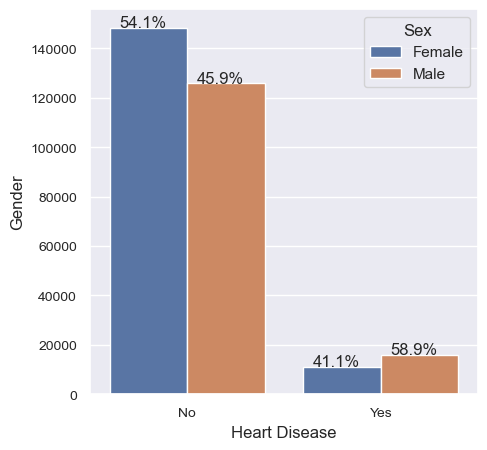

In [21]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="Sex", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Gender", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

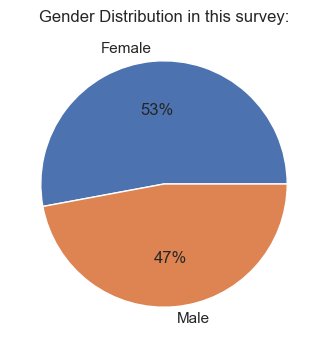

In [22]:
fig, ax = plt.subplots(1, 1,figsize =(5, 4))
ax.pie(cat_df['Sex'].value_counts(),autopct='%1.0f%%',labels=['Female','Male'])
ax.set_title('Gender Distribution in this survey:')
fig.show()

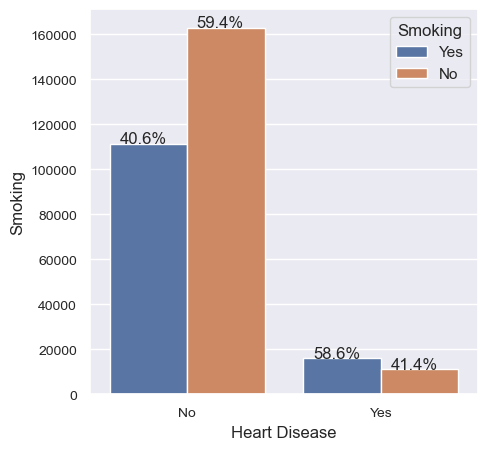

In [23]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="Smoking", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Smoking", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

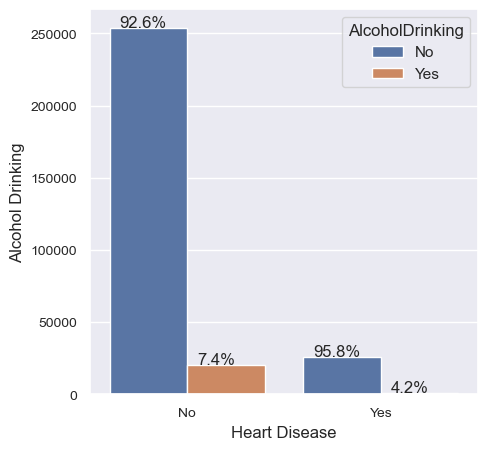

In [24]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="AlcoholDrinking", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Alcohol Drinking", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

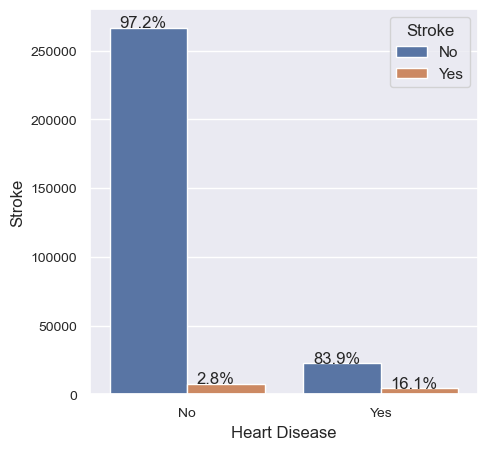

In [25]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="Stroke", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Stroke", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

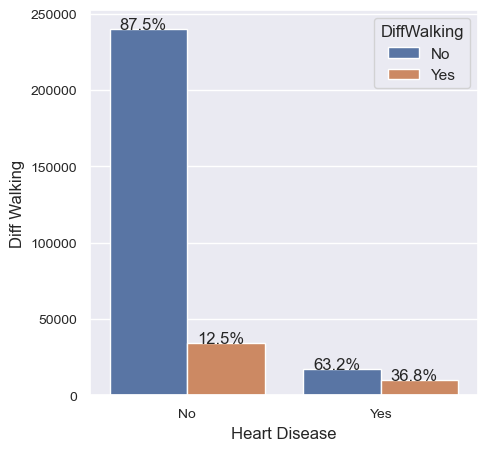

In [26]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="DiffWalking", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Diff Walking", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

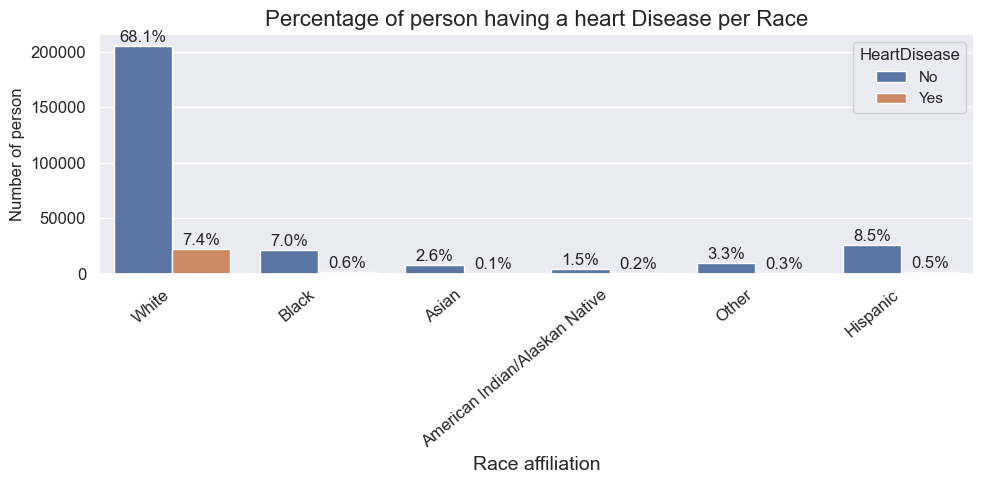

In [27]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = cat_df, x='Race', hue= 'HeartDisease')

plt.xticks(size=12)
plt.xlabel('Race affiliation', size=14)
plt.yticks(size=12)
plt.ylabel('Number of person', size=12)
plt.title("Percentage of person having a heart Disease per Race", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(cat_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

white = 75.5
black = 7.6
asian = 2.7
Native = 1.7
other = 3.6
hisp = 9

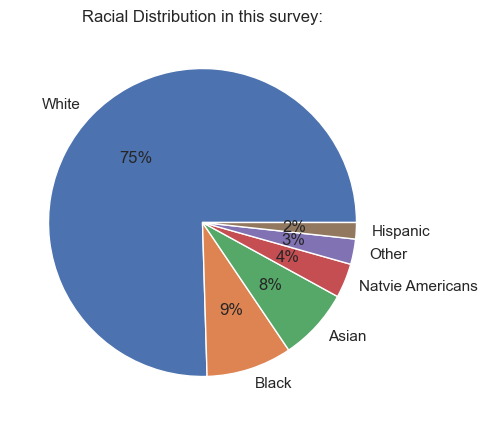

In [54]:
fig, ax = plt.subplots(1, 1,figsize =(5, 5))
ax.pie(cat_df['Race'].value_counts(),autopct='%1.0f%%',
       labels=['White','Black', 'Asian', 'Natvie Americans', 'Other', 'Hispanic'])
ax.set_title('Racial Distribution in this survey:')
fig.show()

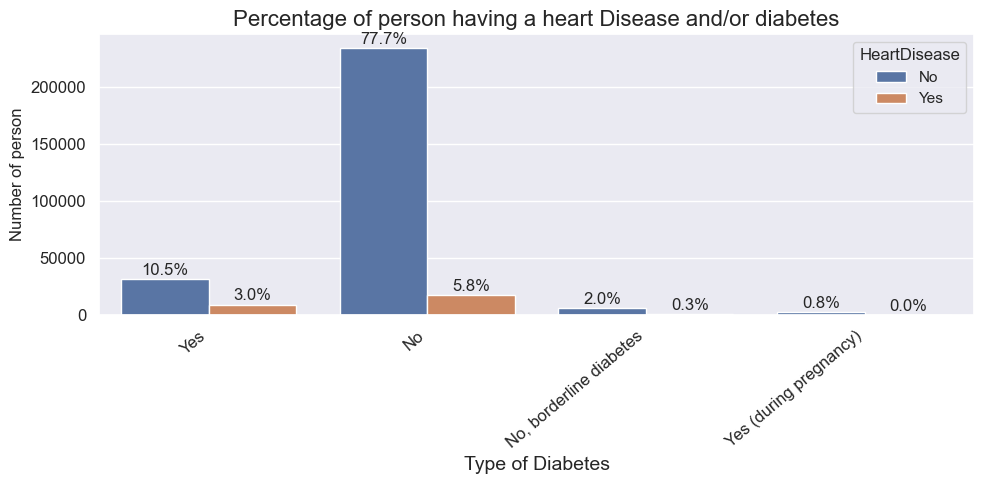

In [29]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = cat_df, x='Diabetic', hue= 'HeartDisease')

plt.xticks(size=12)
plt.xlabel('Type of Diabetes', size=14)
plt.yticks(size=12)
plt.ylabel('Number of person', size=12)
plt.title("Percentage of person having a heart Disease and/or diabetes", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(cat_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

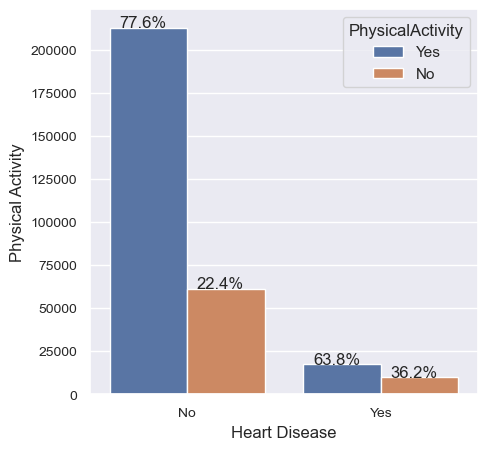

In [30]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="PhysicalActivity", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Physical Activity", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

In [31]:
hue_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

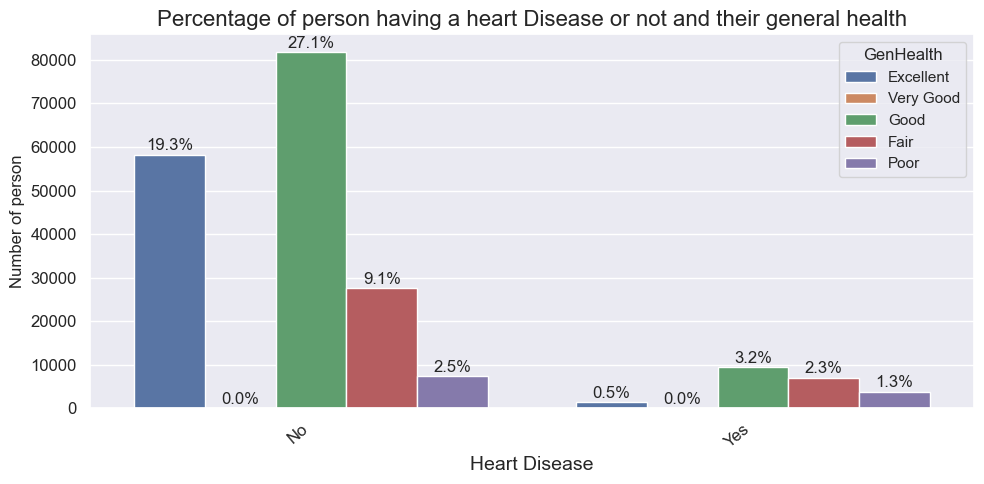

In [32]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = cat_df, x='HeartDisease', hue= 'GenHealth', hue_order=hue_order)

plt.xticks(size=12)
plt.xlabel('Heart Disease', size=14)
plt.yticks(size=12)
plt.ylabel('Number of person', size=12)
plt.title("Percentage of person having a heart Disease or not and their general health", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(cat_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

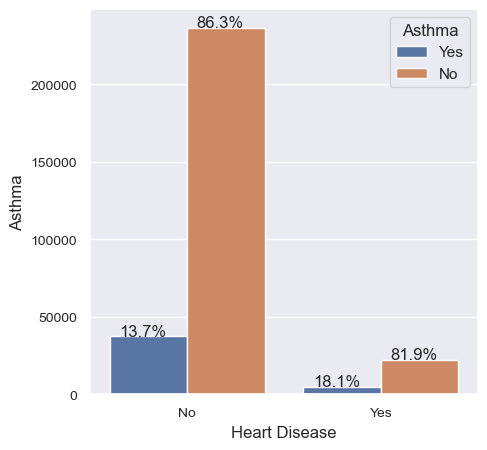

In [33]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="Asthma", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("Asthma", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

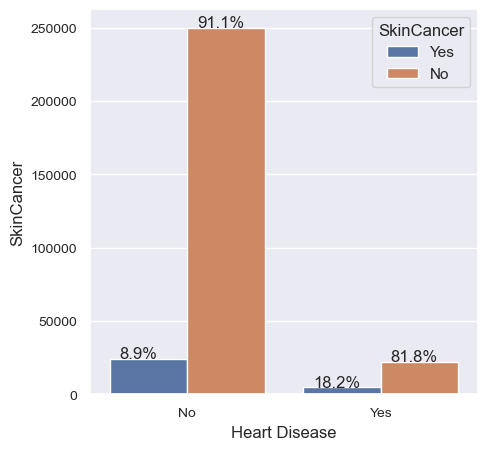

In [34]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="SkinCancer", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("SkinCancer", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

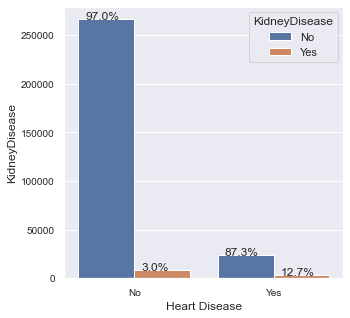

In [62]:
plt.figure(figsize=(5,5))
ax= sns.countplot(x="HeartDisease", hue="KidneyDisease", data= cat_df)
plt.xticks(size=10)
plt.xlabel("Heart Disease", size=12)
plt.yticks(size=10)
plt.ylabel("KidneyDisease", size=12)

with_hue(ax, cat_df["HeartDisease"], 2, 2)

### Quick overview of the numerical features 

In [35]:
num_df.columns

Index(['HeartDisease', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth',
       'SleepTime'],
      dtype='object')

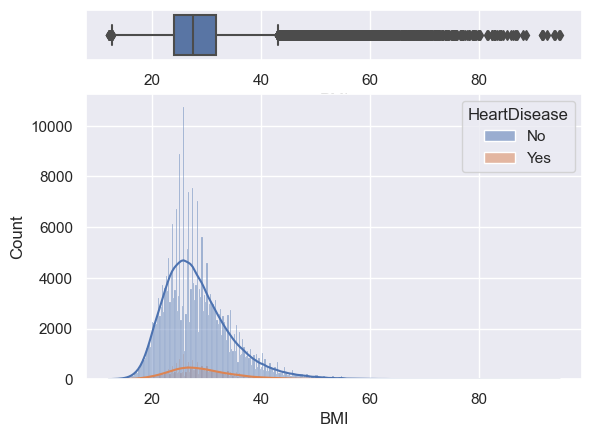

In [36]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(num_df, x="BMI", ax=ax_box)
sns.histplot(data=num_df, x="BMI",hue='HeartDisease',  ax=ax_hist, kde=True, log_scale=False)

plt.show()

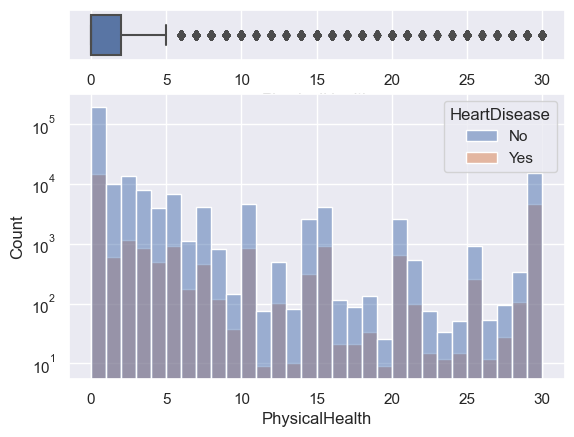

In [37]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df, x="PhysicalHealth", ax=ax_box)
sns.histplot(data=num_df, x="PhysicalHealth", hue='HeartDisease',  ax=ax_hist, bins=30)

plt.yscale('log')
plt.show()

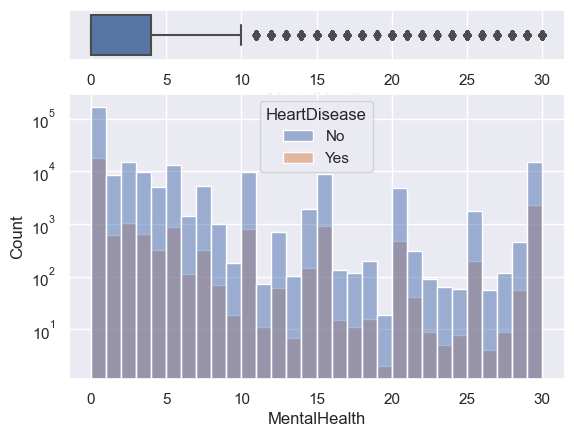

In [38]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df, x="MentalHealth", ax=ax_box)
sns.histplot(data=num_df, x="MentalHealth", hue='HeartDisease',  ax=ax_hist, bins=30)

plt.yscale('log')
plt.show()

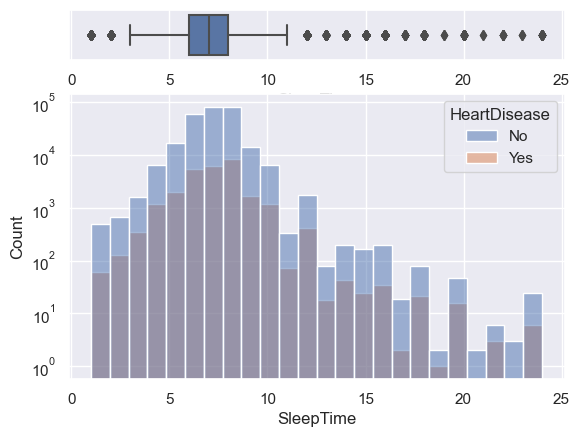

In [39]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df, x="SleepTime", ax=ax_box)
sns.histplot(data=num_df, x="SleepTime", hue='HeartDisease',  ax=ax_hist, bins=24)

plt.yscale('log')
plt.show()

### Age category 

**Note** : year of the survey :2020<br>
**GI Generation** :Born 1901–1924.<br>
**The Silent Generation**: Born 1928–1945.<br>
**Baby Boom Generation**: Born 1946–1964. <br>
**Generation X**: Born 1965–1980.<br>
**Millennial Generation**: Born 1981–1996.<br>
**Generation Z**: Born 1997–2010.<br> 

In [40]:
num_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [41]:
num_df['Age'] = num_df['AgeCategory'].copy()
num_df['Age'] = num_df['Age'].str[:2]
num_df['Age'] = num_df['Age'].astype(int)

In [42]:
num_df["Age_Gen"] = pd.cut(num_df["Age"],bins=[17, 23, 39, 55, 74, np.inf],
                           labels=["GenZ", "Millenium", "GenX", "Boomer","Elderly"], 
                           right=True)

In [43]:
num_df['Age_Gen'].unique()

['GenX', 'Elderly', 'Boomer', 'GenZ', 'Millenium']
Categories (5, object): ['GenZ' < 'Millenium' < 'GenX' < 'Boomer' < 'Elderly']

In [44]:
num_df.head(10)

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,Age_Gen
0,No,55-59,16.60,3.0,30.0,5.0,55,GenX
1,No,80 or older,20.34,0.0,0.0,7.0,80,Elderly
2,No,65-69,26.58,20.0,30.0,8.0,65,Boomer
3,No,75-79,24.21,0.0,0.0,6.0,75,Elderly
4,No,40-44,23.71,28.0,0.0,8.0,40,GenX
5,Yes,75-79,28.87,6.0,0.0,12.0,75,Elderly
6,No,70-74,21.63,15.0,0.0,4.0,70,Boomer
7,No,80 or older,31.64,5.0,0.0,9.0,80,Elderly
8,No,80 or older,26.45,0.0,0.0,5.0,80,Elderly
9,No,65-69,40.69,0.0,0.0,10.0,65,Boomer


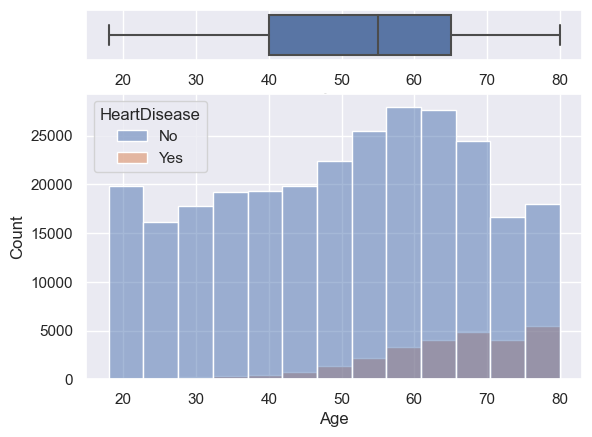

In [45]:
# set a grey background 
sns.set_theme(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df, x="Age", ax=ax_box)
sns.histplot(data=num_df, x="Age", hue='HeartDisease', ax=ax_hist, bins=13)

plt.show()

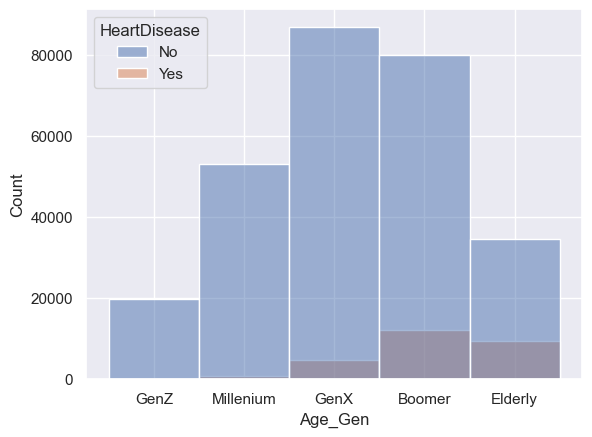

<Figure size 500x400 with 0 Axes>

In [46]:
sns.set_theme(style="darkgrid")
sns.histplot(data=num_df, x="Age_Gen", hue='HeartDisease')

plt.figure(figsize=(5,4))
plt.show()

**Correlation does not necessarily imply causation**<br>


In [49]:
print("\033[1;32m Statistical analysis of the numerical variables \n")
num_df.describe().T

 Statistical analysis of the numerical variables 



,count,mean,std,min,25%,50%,75%,max
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00
SleepTime,301717.0,7.084559,1.467122,1.00,6.00,7.00,8.00,24.00
Age,301717.0,52.414478,18.168500,18.00,40.00,55.00,65.00,80.00


# Preprocessing

In [31]:
#to visualise all columns easier
pd.set_option("display.max_column", 18)
pd.set_option("display.max_row", 150)

Binning BMI for better insights
If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to <25, it falls within the healthy weight range. If your BMI is 25.0 to <30, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obesity range. (cdc)

In [50]:
bins = [0, 18.5, 25, 30, np.inf]
print(bins)

[0, 18.5, 25, 30, inf]


In [51]:
names = ['underweight', 'healthy weight','Overweight', 'Obesity']
num_df['BMICategory'] = pd.cut(num_df['BMI'], bins, labels=names)

In [52]:
#heart_df.drop('BMI',axis=1,inplace=True)
num_df.head(10)

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,Age_Gen,BMICategory
0,No,55-59,16.60,3.0,30.0,5.0,55,GenX,underweight
1,No,80 or older,20.34,0.0,0.0,7.0,80,Elderly,healthy weight
2,No,65-69,26.58,20.0,30.0,8.0,65,Boomer,Overweight
3,No,75-79,24.21,0.0,0.0,6.0,75,Elderly,healthy weight
4,No,40-44,23.71,28.0,0.0,8.0,40,GenX,healthy weight
5,Yes,75-79,28.87,6.0,0.0,12.0,75,Elderly,Overweight
6,No,70-74,21.63,15.0,0.0,4.0,70,Boomer,healthy weight
7,No,80 or older,31.64,5.0,0.0,9.0,80,Elderly,Obesity
8,No,80 or older,26.45,0.0,0.0,5.0,80,Elderly,Overweight
9,No,65-69,40.69,0.0,0.0,10.0,65,Boomer,Obesity


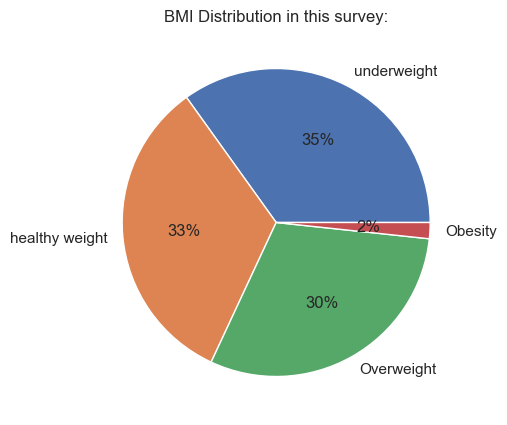

In [56]:
fig, ax = plt.subplots(1, 1,figsize =(5, 5))
ax.pie(num_df['BMICategory'].value_counts(),autopct='%1.0f%%',
       labels=names)
ax.set_title('BMI Distribution in this survey:')
fig.show()

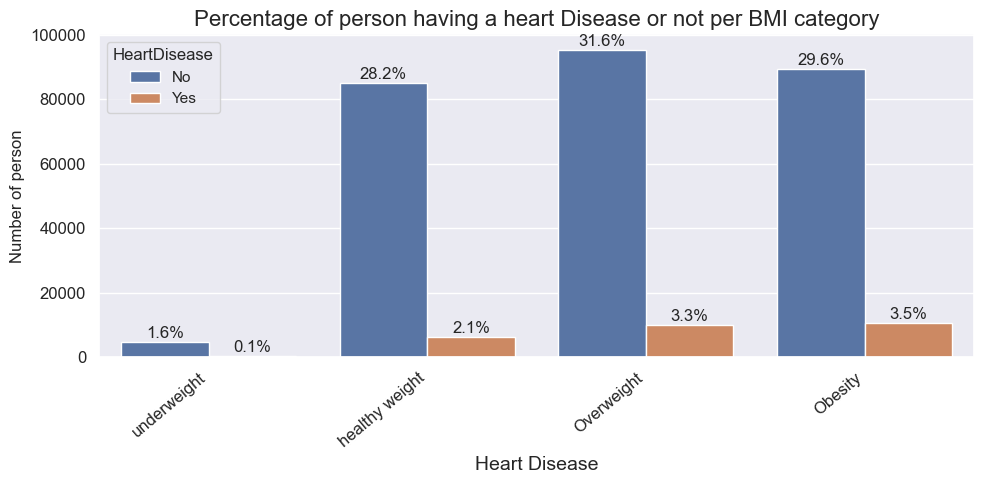

In [53]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data = num_df, x='BMICategory', hue= 'HeartDisease')

plt.xticks(size=12)
plt.xlabel('Heart Disease', size=14)
plt.yticks(size=12)
plt.ylabel('Number of person', size=12)
plt.title("Percentage of person having a heart Disease or not per BMI category", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(num_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### Hot encoding for categorical features

In [57]:
cat_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No


In [58]:
cat_df.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [59]:
for col in cat_df:
    print(f'{col:-<25} {cat_df[col].unique()}')

HeartDisease------------- ['No' 'Yes']
Smoking------------------ ['Yes' 'No']
AlcoholDrinking---------- ['No' 'Yes']
Stroke------------------- ['No' 'Yes']
DiffWalking-------------- ['No' 'Yes']
Sex---------------------- ['Female' 'Male']
Race--------------------- ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic----------------- ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity--------- ['Yes' 'No']
GenHealth---------------- ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma------------------- ['Yes' 'No']
KidneyDisease------------ ['No' 'Yes']
SkinCancer--------------- ['Yes' 'No']


In [60]:
cat_df['HeartDisease'] = cat_df['HeartDisease'] .eq('Yes').mul(1)
cat_df['Smoking'] = cat_df['Smoking'].eq('Yes').mul(1)
cat_df['AlcoholDrinking'] = cat_df['AlcoholDrinking'].eq('Yes').mul(1)
cat_df['Stroke'] = cat_df['Stroke'].eq('Yes').mul(1)
cat_df['DiffWalking'] = cat_df['DiffWalking'].eq('Yes').mul(1)
cat_df['PhysicalActivity'] = cat_df['PhysicalActivity'].eq('Yes').mul(1)
cat_df['Asthma'] = cat_df['Asthma'].eq('Yes').mul(1)
cat_df['KidneyDisease'] = cat_df['KidneyDisease'].eq('Yes').mul(1)
cat_df['SkinCancer'] = cat_df['SkinCancer'].eq('Yes').mul(1)

cat_df['Sex'] = cat_df['Sex'].eq('Female').mul(1) 

cat_df = cat_df.replace({'Diabetic': { 'No': 0, 'No, borderline diabetes': 1, 'Yes': 2, 'Yes (during pregnancy)': 3}})
cat_df = cat_df.replace({'GenHealth': { 'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}})
cat_df = cat_df.replace({'Race': {'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Hispanic': 4, 'Other': 5 }})


In [61]:
for col in cat_df:
    print(f'{col:-<25} {cat_df[col].unique()}')

HeartDisease------------- [0 1]
Smoking------------------ [1 0]
AlcoholDrinking---------- [0 1]
Stroke------------------- [0 1]
DiffWalking-------------- [0 1]
Sex---------------------- [1 0]
Race--------------------- [0 1 2 3 5 4]
Diabetic----------------- [2 0 1 3]
PhysicalActivity--------- [1 0]
GenHealth---------------- [3 1 2 0 4]
Asthma------------------- [1 0]
KidneyDisease------------ [0 1]
SkinCancer--------------- [1 0]


In [62]:
for col in num_df:
    print(f'{col:-<25} {num_df[col].unique()}')

HeartDisease------------- ['No' 'Yes']
AgeCategory-------------- ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
BMI---------------------- [16.6  20.34 26.58 ... 62.42 51.46 46.56]
PhysicalHealth----------- [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth------------- [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime---------------- [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Age---------------------- [55 80 65 75 40 70 60 50 45 18 35 30 25]
Age_Gen------------------ ['GenX', 'Elderly', 'Boomer', 'GenZ', 'Millenium']
Categories (5, object): ['GenZ' < 'Millenium' < 'GenX' < 'Boomer' < 'Elderly']
BMICategory-------------- ['underweight', 'healthy weight', 'Overweight', 'Obesity']
Categories (4, 

**Create a new column where we will scale the data**

Min-max feature scaling is often simply referred to as normalization, which rescales the dataset feature to a range of 0-1.
Below the formula:

<img src="normalisation.png">

In [63]:
num_df['PhysicalHealth_scaled'] = num_df['PhysicalHealth']
num_df['MentalHealth_scaled'] = num_df['MentalHealth']
num_df.head()

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,Age_Gen,BMICategory,PhysicalHealth_scaled,MentalHealth_scaled
0,No,55-59,16.60,3.0,30.0,5.0,55,GenX,underweight,3.0,30.0
1,No,80 or older,20.34,0.0,0.0,7.0,80,Elderly,healthy weight,0.0,0.0
2,No,65-69,26.58,20.0,30.0,8.0,65,Boomer,Overweight,20.0,30.0
3,No,75-79,24.21,0.0,0.0,6.0,75,Elderly,healthy weight,0.0,0.0
4,No,40-44,23.71,28.0,0.0,8.0,40,GenX,healthy weight,28.0,0.0


In [64]:
num_df['PhysicalHealth_scaled'] = (num_df['PhysicalHealth_scaled'] - num_df['PhysicalHealth_scaled'].min())/(num_df['PhysicalHealth_scaled'].max() - num_df['PhysicalHealth_scaled'].min())
num_df['MentalHealth_scaled'] = (num_df['MentalHealth_scaled'] - num_df['MentalHealth_scaled'].min())/(num_df['MentalHealth_scaled'].max() - num_df['MentalHealth_scaled'].min()) 


In [65]:
num_df['MentalHealth_scaled'] = round(num_df['MentalHealth_scaled'], 3)
num_df['PhysicalHealth_scaled'] = round(num_df['PhysicalHealth_scaled'], 3)

In [66]:
for col in num_df:
    print(f'{col:-<25} {num_df[col].unique()}')

HeartDisease------------- ['No' 'Yes']
AgeCategory-------------- ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
BMI---------------------- [16.6  20.34 26.58 ... 62.42 51.46 46.56]
PhysicalHealth----------- [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth------------- [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime---------------- [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Age---------------------- [55 80 65 75 40 70 60 50 45 18 35 30 25]
Age_Gen------------------ ['GenX', 'Elderly', 'Boomer', 'GenZ', 'Millenium']
Categories (5, object): ['GenZ' < 'Millenium' < 'GenX' < 'Boomer' < 'Elderly']
BMICategory-------------- ['underweight', 'healthy weight', 'Overweight', 'Obesity']
Categories (4, 

### Outliers

#### Outliers in feature time sleep: 

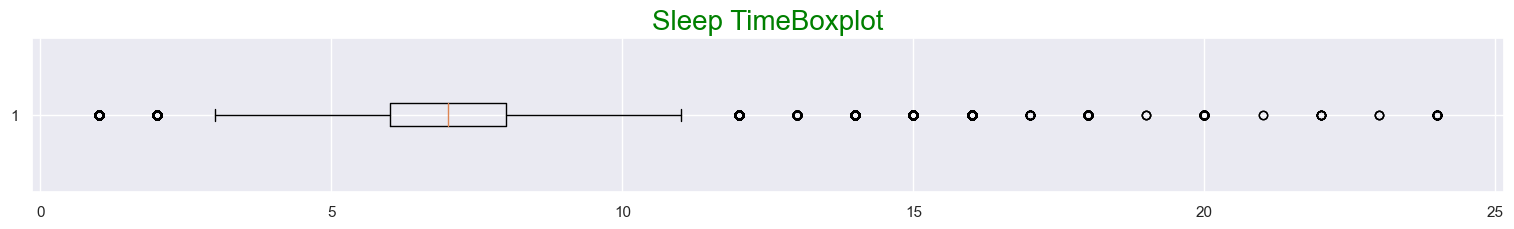

In [67]:
fig = plt.figure(figsize =(19, 2))
plt.boxplot(num_df['SleepTime'], vert=False)
plt.title(label="Sleep TimeBoxplot",fontsize=20, color="green")
plt.show()

In [68]:
print(f'Statistical analysis:\n',
      num_df["SleepTime"].describe())

Statistical analysis:
 count    301717.000000
mean          7.084559
std           1.467122
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64


2 option : using IQR method or taking pathological sleep 

In [75]:
#compute the IQR to calculate the bounderies
iqr = num_df["SleepTime"].quantile(0.75)-num_df["SleepTime"].quantile(0.25)
print('the IQR is:', iqr)

the IQR is: 2.0


In [76]:
# outliers
lower_bridge = num_df["SleepTime"].quantile(0.25)+(iqr*1.5)
upper_bridge = num_df["SleepTime"].quantile(0.75)+(iqr*1.5)
print('threshold for the outliers, lower bridge', lower_bridge, 'and upper bridge', upper_bridge)

threshold for the outliers, lower bridge 9.0 and upper bridge 11.0


In [77]:
print(f'percentage of outliers (lower bridge) in the Sleep Time feature:',
      round(sum(i > 9.0 for i in num_df['SleepTime'])/num_df['SleepTime'].shape[0]*100, 2),'%')

percentage of outliers (lower bridge) in the Sleep Time feature: 3.78 %


In [78]:
print(f'percentage of outliers (uper bridge) in the Sleep Time feature:',
      round(sum(i > 11.0 for i in num_df['SleepTime'])/num_df['SleepTime'].shape[0]*100, 2),'%')

percentage of outliers (uper bridge) in the Sleep Time feature: 1.06 %


**note: average in population = 7 to 10; above 12 symptom of pathology**

In [79]:
print(f'percentage of outliers considered as pathological (above 12hours) in the Sleep Time feature:',
      round(sum(i > 12.0 for i in num_df['SleepTime'])/num_df['SleepTime'].shape[0]*100,4),'%')

percentage of outliers considered as pathological (above 12hours) in the Sleep Time feature: 0.3311 %


In [80]:
print(f'percentage of outliers considered as pathological (under 3 hours) in the Sleep Time feature:',
      round(sum(i < 3 for i in num_df['SleepTime'])/num_df['SleepTime'].shape[0]*100,4),'%')

percentage of outliers considered as pathological (under 3 hours) in the Sleep Time feature: 0.4438 %


In [81]:
num_df.loc[num_df["SleepTime"]>=12, "SleepTime"]=12
num_df.loc[num_df["SleepTime"]<=3, "SleepTime"]=3

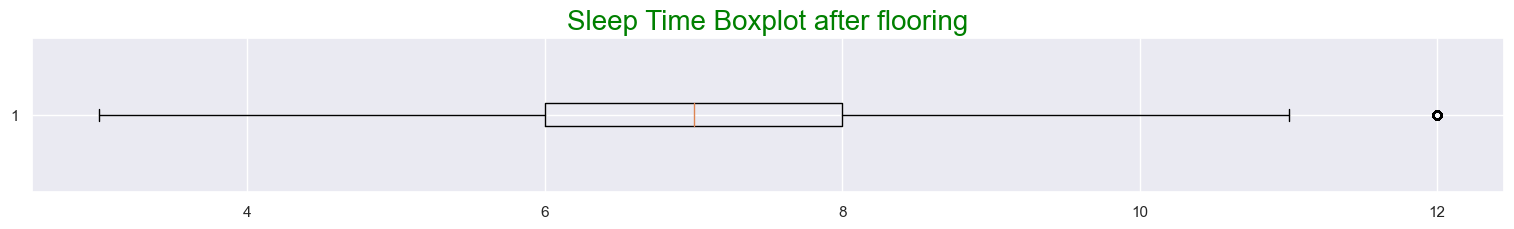

In [82]:
fig = plt.figure(figsize =(19, 2))
plt.boxplot(num_df['SleepTime'], vert=False)
plt.title(label="Sleep Time Boxplot after flooring",fontsize=20, color="green")
plt.show()

In [83]:
print(f'Statistical analysis:\n',
      num_df["SleepTime"].describe())

Statistical analysis:
 count    301717.000000
mean          7.078080
std           1.377433
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          12.000000
Name: SleepTime, dtype: float64


In [84]:
num_df['SleepTime_scaled'] = num_df['SleepTime']
num_df['SleepTime_scaled'] = (num_df['SleepTime_scaled'] - num_df['SleepTime_scaled'].min())/(num_df['SleepTime_scaled'].max() - num_df['SleepTime_scaled'].min())

In [85]:
num_df['SleepTime_scaled'] = round(num_df['SleepTime_scaled'], 3)

In [86]:
for col in num_df:
    print(f'{col:-<25} {num_df[col].unique()}')

HeartDisease------------- ['No' 'Yes']
AgeCategory-------------- ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
BMI---------------------- [16.6  20.34 26.58 ... 62.42 51.46 46.56]
PhysicalHealth----------- [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth------------- [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime---------------- [ 5.  7.  8.  6. 12.  4.  9. 10.  3. 11.]
Age---------------------- [55 80 65 75 40 70 60 50 45 18 35 30 25]
Age_Gen------------------ ['GenX', 'Elderly', 'Boomer', 'GenZ', 'Millenium']
Categories (5, object): ['GenZ' < 'Millenium' < 'GenX' < 'Boomer' < 'Elderly']
BMICategory-------------- ['underweight', 'healthy weight', 'Overweight', 'Obesity']
Categories (4, object): ['underweight' < 'healthy weight' < 'Overweight'

### Features engineering for categorical data 

**first row off the dataset we have so far.**

In [89]:
cat_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,1,0,2,1,3,1,0,1
1,0,0,0,1,0,1,0,0,1,3,0,0,0
2,0,1,0,0,0,0,0,2,1,1,1,0,0
3,0,0,0,0,0,1,0,0,0,2,0,0,1
4,0,0,0,0,1,1,0,0,1,3,0,0,0


In [90]:
num_df.head()

,HeartDisease,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,Age_Gen,BMICategory,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled
0,No,55-59,16.60,3.0,30.0,5.0,55,GenX,underweight,0.100,1.0,0.222
1,No,80 or older,20.34,0.0,0.0,7.0,80,Elderly,healthy weight,0.000,0.0,0.444
2,No,65-69,26.58,20.0,30.0,8.0,65,Boomer,Overweight,0.667,1.0,0.556
3,No,75-79,24.21,0.0,0.0,6.0,75,Elderly,healthy weight,0.000,0.0,0.333
4,No,40-44,23.71,28.0,0.0,8.0,40,GenX,healthy weight,0.933,0.0,0.556


In [91]:
print("\033[1;32m Columns names in cat_df \n")
cat_df.columns

 Columns names in cat_df 



Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [92]:
print("\033[1;32m Columns names in num_df\n")
num_df.columns

 Columns names in num_df



Index(['HeartDisease', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth',
       'SleepTime', 'Age', 'Age_Gen', 'BMICategory', 'PhysicalHealth_scaled',
       'MentalHealth_scaled', 'SleepTime_scaled'],
      dtype='object')

In [101]:
df2 = cat_df[['Sex', 'Race','Smoking', 
              'AlcoholDrinking','DiffWalking','PhysicalActivity', 'GenHealth', 
              'Diabetic', 'Asthma','Stroke','KidneyDisease', 'SkinCancer']]
df1 = num_df[['HeartDisease','Age_Gen','BMICategory',
              'PhysicalHealth_scaled','MentalHealth_scaled','SleepTime_scaled']]

frames = [df1, df2]

**dropping the chosen columns and merging the datasets.**

In [102]:
heart_df2 = pd.concat(frames, axis=1)

In [103]:
heart_df2.head()

,HeartDisease,Age_Gen,BMICategory,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,Sex,Race,Smoking,AlcoholDrinking,DiffWalking,PhysicalActivity,GenHealth,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer
0,No,GenX,underweight,0.100,1.0,0.222,1,0,1,0,0,1,3,2,1,0,0,1
1,No,Elderly,healthy weight,0.000,0.0,0.444,1,0,0,0,0,1,3,0,0,1,0,0
2,No,Boomer,Overweight,0.667,1.0,0.556,0,0,1,0,0,1,1,2,1,0,0,0
3,No,Elderly,healthy weight,0.000,0.0,0.333,1,0,0,0,0,0,2,0,0,0,0,1
4,No,GenX,healthy weight,0.933,0.0,0.556,1,0,0,0,1,1,3,0,0,0,0,0


In [104]:
heart_df2['HeartDisease'] = heart_df2['HeartDisease'] .eq('Yes').mul(1)

In [105]:
for col in heart_df2:
    print(f'{col:-<25} {heart_df2[col].unique()}')

HeartDisease------------- [0 1]
Age_Gen------------------ ['GenX', 'Elderly', 'Boomer', 'GenZ', 'Millenium']
Categories (5, object): ['GenZ' < 'Millenium' < 'GenX' < 'Boomer' < 'Elderly']
BMICategory-------------- ['underweight', 'healthy weight', 'Overweight', 'Obesity']
Categories (4, object): ['underweight' < 'healthy weight' < 'Overweight' < 'Obesity']
PhysicalHealth_scaled---- [0.1   0.    0.667 0.933 0.2   0.5   0.167 1.    0.233 0.033 0.067 0.7
 0.133 0.333 0.467 0.6   0.267 0.833 0.533 0.967 0.9   0.567 0.8   0.4
 0.767 0.867 0.733 0.633 0.3   0.433 0.367]
MentalHealth_scaled------ [1.    0.    0.067 0.167 0.5   0.267 0.133 0.1   0.333 0.467 0.667 0.033
 0.233 0.8   0.3   0.933 0.533 0.4   0.2   0.833 0.567 0.6   0.7   0.967
 0.733 0.433 0.767 0.9   0.867 0.367 0.633]
SleepTime_scaled--------- [0.222 0.444 0.556 0.333 1.    0.111 0.667 0.778 0.    0.889]
Sex---------------------- [1 0]
Race--------------------- [0 1 2 3 5 4]
Smoking------------------ [1 0]
AlcoholDrinking------

In [106]:
le = preprocessing.LabelEncoder()
le.fit(heart_df2['BMICategory'])
heart_df2['BMICategory_en'] = le.transform(heart_df2["BMICategory"])

In [107]:
le.fit(heart_df2['Age_Gen'])
heart_df2['Age_Gen_en'] = le.transform(heart_df2["Age_Gen"])

note underspampling will help to understand and highligt when the answer is in the outliers

In [108]:
heart_df2["BMICategory"] = heart_df2["BMICategory_en"]
heart_df2["Age_Gen"] = heart_df2["Age_Gen_en"]
heart_df2.drop(columns=["BMICategory_en", "Age_Gen_en"], axis=1, inplace=True)

In [109]:
heart_df2.head()

,HeartDisease,Age_Gen,BMICategory,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,Sex,Race,Smoking,AlcoholDrinking,DiffWalking,PhysicalActivity,GenHealth,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer
0,0,2,3,0.100,1.0,0.222,1,0,1,0,0,1,3,2,1,0,0,1
1,0,1,2,0.000,0.0,0.444,1,0,0,0,0,1,3,0,0,1,0,0
2,0,0,1,0.667,1.0,0.556,0,0,1,0,0,1,1,2,1,0,0,0
3,0,1,2,0.000,0.0,0.333,1,0,0,0,0,0,2,0,0,0,0,1
4,0,2,2,0.933,0.0,0.556,1,0,0,0,1,1,3,0,0,0,0,0


### Correlation matrix of all features

In [118]:
heart_df2.columns
col =[ 'HeartDisease', 'Sex', 'Race','Age_Gen', 'BMICategory', 'PhysicalHealth_scaled',
      'MentalHealth_scaled', 'SleepTime_scaled', 'Smoking',
      'AlcoholDrinking', 'DiffWalking', 'PhysicalActivity', 'GenHealth',
      'Diabetic', 'Asthma', 'Stroke', 'KidneyDisease', 'SkinCancer']
heart_df2 = heart_df2[col].copy()
heart_df2.head()

,HeartDisease,Sex,Race,Age_Gen,BMICategory,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,Smoking,AlcoholDrinking,DiffWalking,PhysicalActivity,GenHealth,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer
0,0,1,0,2,3,0.100,1.0,0.222,1,0,0,1,3,2,1,0,0,1
1,0,1,0,1,2,0.000,0.0,0.444,0,0,0,1,3,0,0,1,0,0
2,0,0,0,0,1,0.667,1.0,0.556,1,0,0,1,1,2,1,0,0,0
3,0,1,0,1,2,0.000,0.0,0.333,0,0,0,0,2,0,0,0,0,1
4,0,1,0,2,2,0.933,0.0,0.556,0,0,1,1,3,0,0,0,0,0


In [119]:
print("\033[1;32m Pearson Correlation Matrix amongst the dataset\n")
corr1 = heart_df2
corr1 = corr1.corr(method='pearson')
corr1

 Pearson Correlation Matrix amongst the dataset



,HeartDisease,Sex,Race,Age_Gen,BMICategory,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,Smoking,AlcoholDrinking,DiffWalking,PhysicalActivity,GenHealth,Diabetic,Asthma,Stroke,KidneyDisease,SkinCancer
HeartDisease,1.000000,-0.074435,-0.043605,-0.189029,-0.050030,0.165236,0.020910,0.009422,0.104524,-0.036289,0.196420,-0.093597,-0.237920,0.163686,0.035784,0.194665,0.142672,0.090644
Sex,-0.074435,1.000000,-0.001835,-0.039615,0.066145,0.038428,0.098922,0.015056,-0.087514,-0.006824,0.067335,-0.045309,-0.022366,0.010581,0.067960,0.001343,0.007579,-0.015846
Race,-0.043605,-0.001835,1.000000,0.168672,-0.019047,-0.004023,0.019254,-0.039991,-0.061402,-0.025046,-0.005412,-0.041643,-0.030854,0.022235,0.016013,-0.016708,-0.014591,-0.124034
Age_Gen,-0.189029,-0.039615,0.168672,1.000000,0.037777,-0.105657,0.129480,-0.087537,-0.101968,0.046122,-0.198888,0.093382,0.164782,-0.185124,0.039729,-0.109546,-0.101805,-0.207669
BMICategory,-0.050030,0.066145,-0.019047,0.037777,1.000000,-0.070001,-0.026212,0.045869,-0.020010,0.040004,-0.132157,0.116011,0.186832,-0.181359,-0.062855,-0.017534,-0.040657,0.026583
PhysicalHealth_scaled,0.165236,0.038428,-0.004023,-0.105657,-0.070001,1.000000,0.279663,-0.068357,0.110271,-0.023256,0.422936,-0.224122,-0.480083,0.143421,0.110085,0.132966,0.138220,0.036755
MentalHealth_scaled,0.020910,0.098922,0.019254,0.129480,-0.026212,0.279663,1.000000,-0.129036,0.078364,0.045420,0.142964,-0.084272,-0.230046,0.022475,0.105268,0.041325,0.032107,-0.040215
SleepTime_scaled,0.009422,0.015056,-0.039991,-0.087537,0.045869,-0.068357,-0.129036,1.000000,-0.030915,-0.003337,-0.026836,0.006094,0.067615,0.001105,-0.049169,0.011106,0.005628,0.045916
Smoking,0.104524,-0.087514,-0.061402,-0.101968,-0.020010,0.110271,0.078364,-0.030915,1.000000,0.109183,0.115789,-0.089864,-0.164441,0.047086,0.017545,0.058868,0.031890,0.030438
AlcoholDrinking,-0.036289,-0.006824,-0.025046,0.046122,0.040004,-0.023256,0.045420,-0.003337,0.109183,1.000000,-0.041135,0.024408,0.039991,-0.063423,-0.007114,-0.022707,-0.031166,-0.008739


<Figure size 400x400 with 0 Axes>

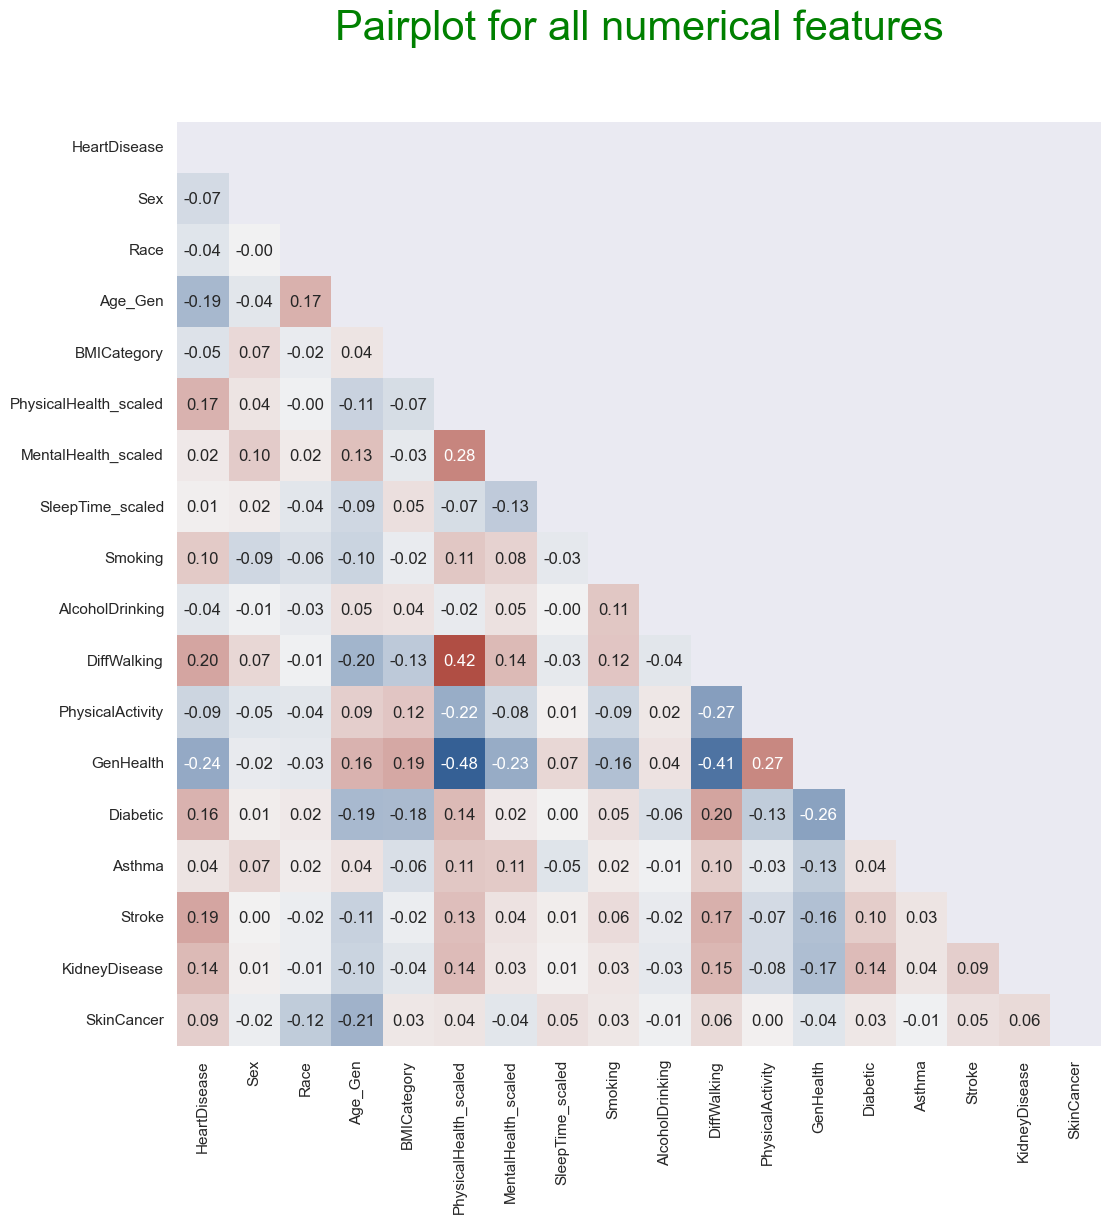

In [120]:
plt.figure(figsize=(4,4))
# Create a mask
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
g =sns.heatmap(corr1, mask=mask, center=0, cbar=False,annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.title("Pairplot for all numerical features",fontsize=30, color="green", y=1.08) 
plt.show()

### Hot Encoding

In [128]:
#to visualise all columns easier
pd.set_option("display.max_column", 50)
pd.set_option("display.max_row", 150)

In [134]:
heart_df3  = heart_df2.copy()
heart_df3.columns

Index(['HeartDisease', 'Sex', 'Race', 'Age_Gen', 'BMICategory',
       'PhysicalHealth_scaled', 'MentalHealth_scaled', 'SleepTime_scaled',
       'Smoking', 'AlcoholDrinking', 'DiffWalking', 'PhysicalActivity',
       'GenHealth', 'Diabetic', 'Asthma', 'Stroke', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [135]:
heart_df3 = pd.get_dummies(heart_df3, 
                        columns = ['Sex', 'Race','Age_Gen', 'BMICategory',
                                   'Smoking', 'AlcoholDrinking', 'DiffWalking', 'PhysicalActivity',
                                   'GenHealth', 'Diabetic', 'Stroke', 'Asthma', 'KidneyDisease','SkinCancer' ], 
                        prefix = ['Sex', 'Race','Age', 'BMI', 'Smoking', 'Alcohol', 'DiffWalking', 'Activity',
                                   'GenHealth', 'Diabetic', 'Stroke', 'Asthma', 'KidneyDisease','SkinCancer'])
heart_df3.head()

,HeartDisease,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,Sex_0,Sex_1,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,Smoking_0,Smoking_1,Alcohol_0,Alcohol_1,DiffWalking_0,DiffWalking_1,Activity_0,Activity_1,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,Stroke_0,Stroke_1,Asthma_0,Asthma_1,KidneyDisease_0,KidneyDisease_1,SkinCancer_0,SkinCancer_1
0,0,0.100,1.0,0.222,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1
1,0,0.000,0.0,0.444,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0
2,0,0.667,1.0,0.556,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0
3,0,0.000,0.0,0.333,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
4,0,0.933,0.0,0.556,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [136]:
for col in heart_df3:
    print(f'{col:-<25} {heart_df3[col].unique()}')

HeartDisease------------- [0 1]
PhysicalHealth_scaled---- [0.1   0.    0.667 0.933 0.2   0.5   0.167 1.    0.233 0.033 0.067 0.7
 0.133 0.333 0.467 0.6   0.267 0.833 0.533 0.967 0.9   0.567 0.8   0.4
 0.767 0.867 0.733 0.633 0.3   0.433 0.367]
MentalHealth_scaled------ [1.    0.    0.067 0.167 0.5   0.267 0.133 0.1   0.333 0.467 0.667 0.033
 0.233 0.8   0.3   0.933 0.533 0.4   0.2   0.833 0.567 0.6   0.7   0.967
 0.733 0.433 0.767 0.9   0.867 0.367 0.633]
SleepTime_scaled--------- [0.222 0.444 0.556 0.333 1.    0.111 0.667 0.778 0.    0.889]
Sex_0-------------------- [0 1]
Sex_1-------------------- [1 0]
Race_0------------------- [1 0]
Race_1------------------- [0 1]
Race_2------------------- [0 1]
Race_3------------------- [0 1]
Race_4------------------- [0 1]
Race_5------------------- [0 1]
Age_0-------------------- [0 1]
Age_1-------------------- [0 1]
Age_2-------------------- [1 0]
Age_3-------------------- [0 1]
Age_4-------------------- [0 1]
BMI_0-------------------- [0 1]
BMI_

In the first step PCA is applied on the dataset to compact the dataset and eliminate irrelevant features and in the second step SMOTE resampling is carried out to balance the class distribution and increase the variety of sample domain. Finally, XXX classifier is applied on the resulting dataset and the results are compared and evaluation metrics are calculated. The experiments show the effectiveness of the proposed method across four evaluation metrics: <span class="mark">Overall accuracy, False Positive Rate, Precision, Recall</span>.

## LDA

In [148]:
target = heart_df3['HeartDisease'].copy()
heart_prepro = heart_df3.copy()
heart_prepro.drop(columns='HeartDisease', axis=1, inplace=True)

In [142]:
heart_prepro.head()

,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,Sex_0,Sex_1,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,Smoking_0,Smoking_1,Alcohol_0,Alcohol_1,DiffWalking_0,DiffWalking_1,Activity_0,Activity_1,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,Stroke_0,Stroke_1,Asthma_0,Asthma_1,KidneyDisease_0,KidneyDisease_1,SkinCancer_0,SkinCancer_1
0,0.100,1.0,0.222,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1
1,0.000,0.0,0.444,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0
2,0.667,1.0,0.556,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0
3,0.000,0.0,0.333,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1
4,0.933,0.0,0.556,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [143]:
print('shape of the new dataframe, number of rows for target:',target.shape[0], 
      '\n and number of rows for the dependant variable:', heart_prepro.shape[0])

shape of the new dataframe, number of rows for target: 301717 
 and number of rows for the dependant variable: 301717


In [140]:
#Fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

[0.11306718 0.21452463 0.29513302 0.35950383 0.41932266 0.47787411
 0.53482338 0.58230275 0.62891323 0.67237831 0.71291896 0.75125786
 0.78536393 0.81606806 0.84071911 0.86305481 0.88318114 0.89870004
 0.91350465 0.92752829 0.94040927 0.95201887 0.96115999 0.96969429
 0.97593873 0.98142869 0.98624311 0.99042917 0.99450271 0.9980425
 1.        ] 0.9999999999999999 (31,)


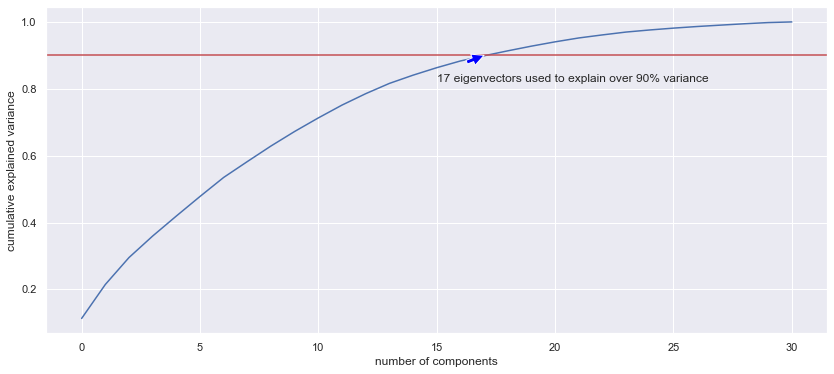

In [125]:
# Plotting the Data
X = wine.data
y = target
target_names = wine.target_names
lda = LinearDiscriminantAnalysis().fit(X, y).transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Wine dataset')
    axes[1].title.set_text('PCA for Wine dataset')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')

#adding an arrow and annotations
arrowprops=dict(facecolor='blue', shrink=0.5)
an = plt.annotate("17 eigenvectors used to explain over 90% variance", 
                  xy=(17, 0.9), xytext=(15, 0.82), arrowprops=arrowprops)
plt.show()

In [126]:
# Running PCA again
pca = PCA(n_components=17, random_state = 42)
variables_pca = pca.fit(heart_prepro).transform(heart_prepro)

In [127]:
print("\033[1;32m creating new dataframe for machine learning \n")
variables_pca_df = pd.DataFrame(variables_pca)
heart_ml = variables_pca_df.copy()
heart_ml= heart_ml.add_prefix('PC_')
heart_ml.head()

 creating new dataframe for machine learning 



,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
0,0.541114,0.355735,-0.892494,-0.146382,0.280911,1.099929,-0.075425,1.149197,0.310113,0.301540,0.428404,0.586624,1.057455,0.742741,0.480679,-0.738221,-0.307566
1,-0.889193,0.698632,-0.511504,0.335680,-0.491268,0.071171,0.539300,0.297565,-0.280077,0.148156,0.710550,-0.265995,0.035721,-0.084257,-0.398030,0.481732,0.286401
2,1.059640,-0.870836,-0.060952,0.712126,0.089032,0.376989,-0.577882,0.722107,1.260793,-0.107567,-0.172923,0.634452,0.813533,-0.407507,0.078835,-0.387986,0.886226
3,0.042785,1.020463,0.049162,0.454755,-0.465371,-1.109624,0.338371,-0.016348,-1.027032,0.958553,0.551409,-0.058355,0.298935,0.949160,0.136521,-0.124312,0.046073
4,-0.424075,0.919463,-0.247187,-0.048742,-0.126145,0.221612,0.736649,1.042010,-0.238028,-0.287477,0.364440,0.021516,-1.011992,-0.583408,0.042021,-0.247094,-0.470901


<AxesSubplot:title={'center':'PCA componants distribution'}>

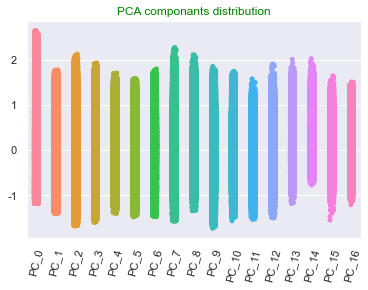

In [128]:
plt.xticks(rotation=75)
plt.title('PCA componants distribution', color='green')
sns.set(rc={'figure.figsize':(16,7)})
sns.stripplot(data=heart_ml)

## Resampling 

Under-sampling - as we are interested in the class 1 (heart disease is yes)

There are three versions of the technique, named NearMiss-1, NearMiss-2, and NearMiss-3.

NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class. NearMiss-2 selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class. NearMiss-3 involves selecting a given number of majority class examples for each example in the minority class that are closest.

Here, distance is determined in feature space using Euclidean distance or similar.

    NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
    NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
    NearMiss-3: Majority class examples with minimum distance to each minority class example.

The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary.
source: https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

In [152]:
for label, _ in target.items():
    row_ix = where(target == label)[0]
    pyplot.scatter(target[row_ix, 0], target[row_ix, 1], label=str(label))

pyplot.legend()
pyplot.show()

NameError: name 'where' is not defined

In [129]:
# NearMiss
X=heart_ml
y= target 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

# Create an object by calling a methof NearMiss()
nr = NearMiss()

# Train the model
X_train, y_train = nr.fit_resample(X_train, y_train)

**We are going to run the machine learning algorithm with 2 datasets:**
- baseline :raw dataset 
- ML_PCA: dataset after PCA and undersampling 

**check the correlation matrix one last time to ensure that we did not lose any valuable information**

df_corr2 = heart_ml
df_corr2 = df_corr2.corr()
df_corr2

plt.figure(figsize=(20,20))
# Create a mask
mask = np.triu(np.ones_like(df_corr2, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
g =sns.heatmap(df_corr2, mask=mask, center=0, cbar=False,annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.title("Pairplot for all features",fontsize=30, color="green", y=1.08) 
plt.show()

## Backup point before ML

#df PCA 
heart_ml.to_csv('dataset/Heart_ml.csv')

#df target
target.to_csv('dataset/target.csv')

#df baseline
heart_prepro.to_csv('dataset/heart_prepro.csv')

In [254]:
ml_pca = pd.read_csv("dataset/Heart_ml.csv")
target = pd.read_csv("dataset/target.csv")
heart_baseline = pd.read_csv("dataset/heart_prepro.csv")

In [141]:
heart_baseline.head()

,Unnamed: 0,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,Sex_0,Sex_1,Race_0,Race_1,Race_2,...,BMI_0,BMI_1,BMI_2,BMI_3,Age_0,Age_1,Age_2,Age_3,Age_4
0,0,0.100,1.0,0.222,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0
1,1,0.000,0.0,0.444,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0
2,2,0.667,1.0,0.556,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0
3,3,0.000,0.0,0.333,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0
4,4,0.933,0.0,0.556,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0


In [117]:
target.head()

,Unnamed: 0,HeartDisease
0,0,No
1,1,No
2,2,No
3,3,No
4,4,No


In [132]:
ml_pca.head()

,Unnamed: 0,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
0,0,0.541114,0.355735,-0.892494,-0.146382,0.280911,1.099929,-0.075425,1.149197,0.310113,0.301540,0.428404,0.586624,1.057455,0.742741,0.480679,-0.738221,-0.307566
1,1,-0.889193,0.698632,-0.511504,0.335680,-0.491268,0.071171,0.539300,0.297565,-0.280077,0.148156,0.710550,-0.265995,0.035721,-0.084257,-0.398030,0.481732,0.286401
2,2,1.059640,-0.870836,-0.060952,0.712126,0.089032,0.376989,-0.577882,0.722107,1.260793,-0.107567,-0.172923,0.634452,0.813533,-0.407507,0.078835,-0.387986,0.886226
3,3,0.042785,1.020463,0.049162,0.454755,-0.465371,-1.109624,0.338371,-0.016348,-1.027032,0.958553,0.551409,-0.058355,0.298935,0.949160,0.136521,-0.124312,0.046073
4,4,-0.424075,0.919463,-0.247187,-0.048742,-0.126145,0.221612,0.736649,1.042010,-0.238028,-0.287477,0.364440,0.021516,-1.011992,-0.583408,0.042021,-0.247094,-0.470901


In [255]:
ml_pca.drop("Unnamed: 0", axis=1, inplace=True)
target.drop("Unnamed: 0", axis=1, inplace=True)
heart_baseline.drop("Unnamed: 0", axis=1, inplace=True)

In [257]:
target.head()

,HeartDisease
0,No
1,No
2,No
3,No
4,No


In [258]:
target['HeartDisease'] = target['HeartDisease'].eq('Yes').mul(1)

In [259]:
target['HeartDisease'].unique()

array([0, 1], dtype=int32)

In [462]:
heart_baseline.head()

,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled,Sex_0,Sex_1,Race_0,Race_1,Race_2,Race_3,...,BMI_0,BMI_1,BMI_2,BMI_3,Age_0,Age_1,Age_2,Age_3,Age_4
0,0.100,1.0,0.222,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0
1,0.000,0.0,0.444,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0
2,0.667,1.0,0.556,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0
3,0.000,0.0,0.333,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0
4,0.933,0.0,0.556,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0


# Machine learning

****

##  Choice of the model and dataset

### Before features engineering

**A dataframe compiling all the outcome form differents model of machine learning will be created**<br> **Note:** where parametres is "None", we choose the default parametres of the choosen model.

In [389]:
score_df = pd.DataFrame(columns= ['DF', 'ML','Parametres','Train score','Precision','Recall', 'Accuracy', 'F1'], data=None)
score_df.head()

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1


In [390]:
def ml_model (model, X):
    X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 42) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    train_scr = round(model.score(X_test, y_test), 4)
    accuracy_scr = round(accuracy_score(y_test, y_pred),4)
    recall_scr = round(recall_score(y_test, y_pred),4)
    precision_scr = round(precision_score(y_test, y_pred),4)
    f1_scr = round(f1_score(y_test, y_pred),4)
    
    global score_df
    score_df =score_df.append({'DF':X.name,
                               'Parametres': parametres,
                               'ML':type(model).__name__,
                               'Train score':train_scr,
                               'Precision':precision_scr,
                               'Recall':recall_scr,
                               'Accuracy':accuracy_scr,
                               'F1':f1_scr},
                              ignore_index=True)
    return (score_df)

In [391]:
X = heart_baseline
y= target

In [392]:
model = KNeighborsClassifier(n_neighbors=3)
X=X
X.name = "heart_baseline"
parametres = ("n_neighbors=3")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,heart_baseline,KNeighborsClassifier,n_neighbors=3,0.8926,0.3173,0.1644,0.8926,0.2166


In [393]:
model = GaussianNB()
X=X
X.name = "heart_baseline"
parametres = ("")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,heart_baseline,KNeighborsClassifier,n_neighbors=3,0.8926,0.3173,0.1644,0.8926,0.2166
1,heart_baseline,GaussianNB,,0.7837,0.2341,0.6139,0.7837,0.3389


In [394]:
model = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
X=X
X.name = "heart_baseline"
parametres = ("max_samples=0.5, max_features=0.5")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,heart_baseline,KNeighborsClassifier,n_neighbors=3,0.8926,0.3173,0.1644,0.8926,0.2166
1,heart_baseline,GaussianNB,,0.7837,0.2341,0.6139,0.7837,0.3389
2,heart_baseline,BaggingClassifier,"max_samples=0.5, max_features=0.5",0.9105,0.5676,0.0385,0.9105,0.0722


### After PCA 

In [395]:
X = ml_pca
y= target

In [396]:
model = KNeighborsClassifier(n_neighbors=3)
X=X
X.name = "ml_pca"
parametres = ("n_neighbors=3")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,heart_baseline,KNeighborsClassifier,n_neighbors=3,0.8926,0.3173,0.1644,0.8926,0.2166
1,heart_baseline,GaussianNB,,0.7837,0.2341,0.6139,0.7837,0.3389
2,heart_baseline,BaggingClassifier,"max_samples=0.5, max_features=0.5",0.9105,0.5676,0.0385,0.9105,0.0722
3,ml_pca,KNeighborsClassifier,n_neighbors=3,0.8925,0.3130,0.1594,0.8925,0.2113


In [397]:
model = GaussianNB()
X=X
X.name = "ml_pca"
parametres = ("")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,heart_baseline,KNeighborsClassifier,n_neighbors=3,0.8926,0.3173,0.1644,0.8926,0.2166
1,heart_baseline,GaussianNB,,0.7837,0.2341,0.6139,0.7837,0.3389
2,heart_baseline,BaggingClassifier,"max_samples=0.5, max_features=0.5",0.9105,0.5676,0.0385,0.9105,0.0722
3,ml_pca,KNeighborsClassifier,n_neighbors=3,0.8925,0.3130,0.1594,0.8925,0.2113
4,ml_pca,GaussianNB,,0.8798,0.3169,0.2861,0.8798,0.3007


In [398]:
model = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
X=X
X.name = "ml_pca"
parametres = ("max_samples=0.5, max_features=0.5")

ml_model(model, X)

,DF,ML,Parametres,Train score,Precision,Recall,Accuracy,F1
0,heart_baseline,KNeighborsClassifier,n_neighbors=3,0.8926,0.3173,0.1644,0.8926,0.2166
1,heart_baseline,GaussianNB,,0.7837,0.2341,0.6139,0.7837,0.3389
2,heart_baseline,BaggingClassifier,"max_samples=0.5, max_features=0.5",0.9105,0.5676,0.0385,0.9105,0.0722
3,ml_pca,KNeighborsClassifier,n_neighbors=3,0.8925,0.3130,0.1594,0.8925,0.2113
4,ml_pca,GaussianNB,,0.8798,0.3169,0.2861,0.8798,0.3007
5,ml_pca,BaggingClassifier,"max_samples=0.5, max_features=0.5",0.9075,0.4298,0.0752,0.9075,0.1280


### Visualisation and analysis 

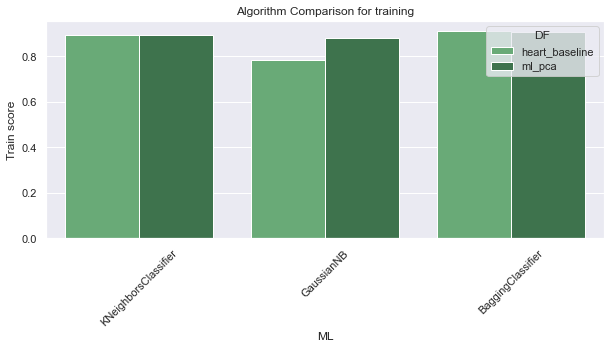

In [403]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.title('Algorithm Comparison for training')
sns.barplot(data=score_df, x='ML', y='Train score', palette='Greens_d', hue='DF')

plt.show()

**From the training score we have 2 ML: KNeighborsClassifier and BaggingClassifier that are having good training scores for the baseline dataset and the dataset after PCA. Let's see the others metrics.** 

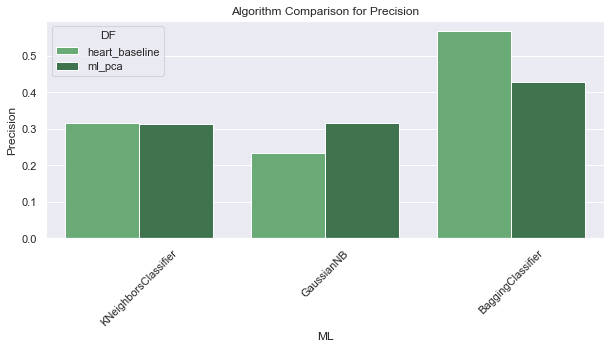

In [404]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.title('Algorithm Comparison for Precision')
sns.barplot(data=score_df, x='ML', y='Precision', palette='Greens_d', hue='DF')

plt.show()

**The BaggingClassifier ML has the highest score for the baseline dataset with a score of 0.5676 instead of the dataset after PCA showing a score of 0.4298. So we have more chances of having a lower number in the false positives (not real heart disease results).**

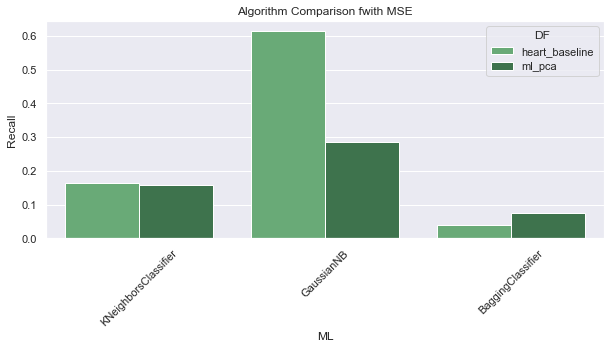

In [405]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.title('Algorithm Comparison fwith MSE')
sns.barplot(data=score_df, x='ML', y='Recall', palette='Greens_d', hue='DF')

plt.show()

**The GaussianNB model has the highest score for the baseline dataset with 0.6139. There are more chance of having high numbers of the true positives (only true results on people having with a heart disease) on a prediction between the training and the test dataset.** 

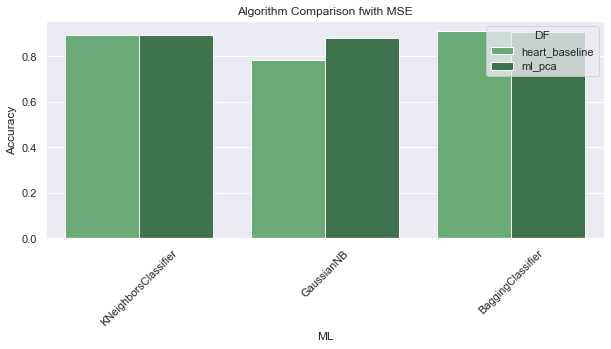

In [406]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.title('Algorithm Comparison fwith MSE')
sns.barplot(data=score_df, x='ML', y='Accuracy', palette='Greens_d', hue='DF')

plt.show()

**The KNeighborsClassifier and BaggingClassifier have the better numbers for accuracy corresponding 0.9075 for the first model and 0.9105 for the second model. We can understand the BaggingClassifier model has more chances of having an high overall number for the true positives and negatives results (true results on people having or not a heart disease).**

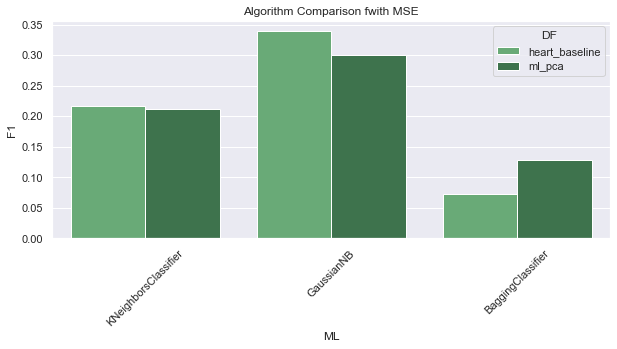

In [407]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.title('Algorithm Comparison fwith MSE')
sns.barplot(data=score_df, x='ML', y='F1', palette='Greens_d', hue='DF')

plt.show()

**After comparing all the scores from Precision, Recall, Accuracy and F1, and considering for a machine learning model prediction on heart disease dataset it will be better to rely on the Recall to find the most accurate results (the true positives results). We can state the GaussianNB had the highest scores on Recall parameters and is the best option**. 

### Comparison between training and test datasets with current parameters

In [458]:
X = heart_baseline
y= target

model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

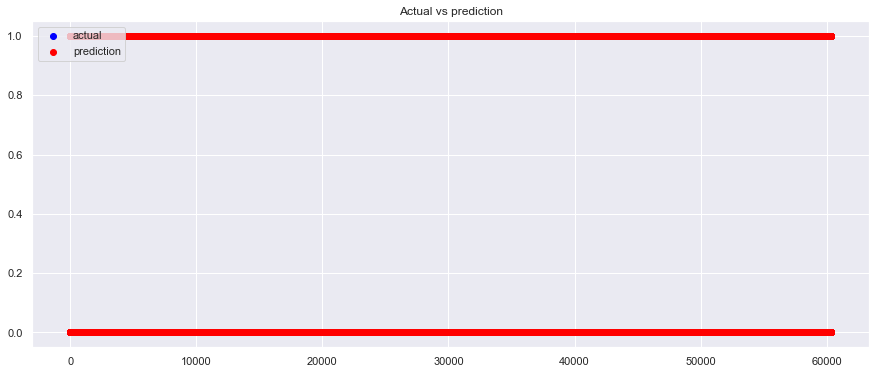

In [460]:
def plotGraph(y_test,y_pred,GaussianNB): 
    plt.scatter(range(len(y_test)), y_test, color='blue', label = 'actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label = 'prediction')
    plt.title(GaussianNB)
    plt.legend(loc="upper left")
    plt.show()
    return

plt.figure(figsize=(15,6))
plotGraph(y_test, y_pred, "Actual vs prediction")

**As all of the features has 0 or 1 values we can observe that the graph has only 2 possible outcomes for visualisation. We can also understand the value from the trainig dataset to the test dataset are really similar. So the chances to have a good prediction with the model are high.**

### Confusion matrix before tunning hyperparametres

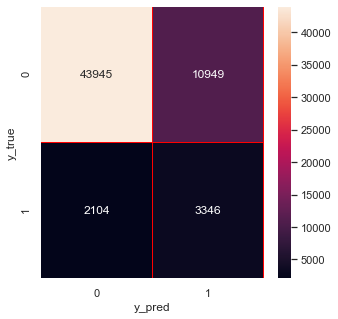

In [461]:
cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**By the confusion matrix performance of the baseline dataset we can see the true positives 43945 (prediction on people that have not a heart disease) and the true negatives as 3346 (prediction on people that has a heart disease), we have some good results. The false positive 2104 (the positive results that are showing as negatives, meaning false results of people that has a heart disease) represent 3.48% over a total of test dataset of 60,344. The number is low so we have a good probability of having a accurate prediction on the model.**

### Tuning the hyperparametres using Pipeline and GridSearchCV 

In [447]:
X = heart_baseline
y= target

# test is now 10% of the entire data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X=X_train
y= y_train

# validation is now 10% of the new dataframe
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42) 

cv=KFold(n_splits=15, shuffle=False)
model = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [448]:
from pprint import pprint
# Look at parameters used by our current model
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': KNeighborsClassifier(),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [453]:
# Create a pipeline
pipe = Pipeline([("classifier", KNeighborsClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [3, 5, 8, 10, 11, 12, 13, 14, 15],
                 "classifier__weights": ['uniform','distance'], 
                 "classifier__metric": ['minkowski','euclidean','manhattan'],
                 "classifier__algorithm": ['auto','brute','ball_tree','kd_tree'],
                 "classifier__leaf_size": [30],
                 "classifier__metric_params": [None],
                 "classifier__n_jobs": [None],
                 },
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [3, 5, 8, 10, 11, 12, 13, 14, 15],
                 "classifier__weights": ['uniform','distance'], 
                 "classifier__metric": ['minkowski','euclidean','manhattan'],
                 "classifier__algorithm": ['auto','brute','ball_tree','kd_tree'],
                 "classifier__leaf_size": [30],
                 "classifier__metric_params": [None],
                 "classifier__n_jobs": [None],
                 "classifier__p": [2, 3, 4, 5, 10, 25 ]
                 }]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=cv, verbose=0,n_jobs=10) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
#print best parameters after tuning
print("Results from Grid Search: " )
print('Best parametres: ', gridsearch.best_params_) 
grid_predictions = gridsearch.predict(X_val)
bestscore = gridsearch.best_score_
print("\n The best score across ALL searched parametres:",round(bestscore, 2))

### Prediction with all parameters and the testing set 

In [ ]:
X=bikes_baseline
y= target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#from above the optimal Kfolds for this dataset
cv=KFold(n_splits=15, shuffle=False)

model = KNeighborsRegressor( n_neighbors=11,
                            weights='distance',
                            algorithm='auto',
                            p=2,
                            metric='manhattan',
                            metric_params=None,
                            n_jobs=10)

In [ ]:
model.fit(X_train, y_train)

print("Training accuracy:",model.score(X_train, y_train)) 
print("Testing accuracy:",model.score(X_test, y_test))
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

plt.scatter(y_train,y_pred_train);
plt.scatter(y_train,y_pred_train);

In [ ]:
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_pred)),4))

print('Train Data Score:', round(model.score(X_train, y_train),4))
print('Test Data Score:', round(model.score(X_test, y_test),4))

In [ ]:
print('Improvement of {:0.2f}%.'.format(
    100 * (mean_absolute_error(y_test, y_pred) - 385.864) / 385.864))

**With an improvement of 7.5%, this machine learning model is not a good fit for this dataset. <br> We have to look at the result with the Random Forest Regressor. If this model does not perform well too, we might have to look into other regression models like the polynomial one. But our first advice before deployment will be to gather more data.**   

## Conclusion 

 **The Randon Forest Regressor coupled with Random Search is the best model for this datasetso far. The final result: Train Data Score: 0.7995 and Test Data Score: 0.7134. By tuning the hyperparameters, the model is not overfitting. <br>Some of the ways to improve our results are following:<br>Add more data: Collect more training data; This may not always help, though as adding more data may result in noise. In this case, we need more data related to the weather as we have seen a bigger correlation between that topic and the number of rented bikes. We can gather data on the weather, like the precipitation, as the percentage of humidity needs to be better. <br>
We only have nine features before hot encoding, so we have some room to complexify the model.<br> Look for other Regressor model as the KNregressor was not performing as well as expected**  